# U.S. Medical Insurance Costs

In [1]:
#first task is to import numpy and matplotlib  and read in info from the patient records csv file; then
#use zip to create dictionary form of the data; whole analysys could have been done with this dictionary.
#lists of values of columns for the original file are created (as suggested in assignment)


data consists of:  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
number of patient records is:  1338

 Means and Medians for Numeric Data

mean_bmi:  30.7 mean age:  39.21
mean_charges:  13270 mean_children:  1.09
median_bmi:  30.4 median age:  39.0
median_charges:  9382 median_children:  1.0

 Proportions for Non-numeric Data

20.5 % of patients in the database smoke
percent females:  49.5 % percent males:  50.5 %

For Distribution of Patients by Region, A Bar Chart is Employed



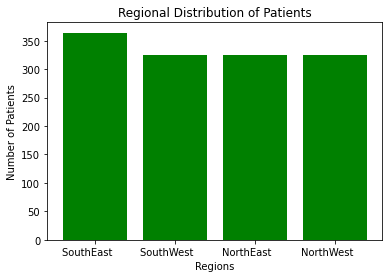


 For the Distribution of the Number of Children Patients in the Data Base have, a Bar Chart is Employed


 No Children:  574 
 One Child:  324 
 Two children:  240
 Three Children : 157 
 Four Children 25 
 Five Children 18
 More than Five Children 0


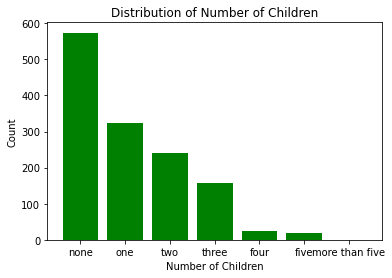

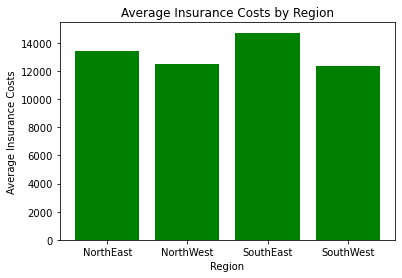

In [32]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib as plt
import csv

age_list = []
bmi_list = []
children_list = []
smoker_list = []
sex_list = []
region_list = []
charges_list = []
newkey = -1
patient_dictionaries = {}

with open("insurance.csv", newline = "\n")  as insurance_db:

    spamreader = csv.reader(insurance_db)
    for row in spamreader:
       
        if newkey == -1:
            save_keys = row
            newkey = newkey + 1
            print("data consists of: ", save_keys)
            continue
        elif newkey >= 0:
            record_dict = dict(zip(save_keys,row))
            key = newkey - 1
            patient_dictionaries[newkey] = record_dict
            bmi_list.append(float(record_dict["bmi"]))
            sex_list.append(record_dict["sex"])
            smoker_list.append(record_dict["smoker"])
            children_list.append(float(record_dict["children"]))
            age_list.append(float(record_dict["age"]))
            region_list.append(record_dict["region"])
            charges_list.append(float(record_dict["charges"]))
            newkey = newkey + 1
        patient_dictionaries[newkey] = record_dict
            
#calculate means and medians for numeric data sets
    
    length = len(bmi_list)
    print("number of patient records is: ",length)
    mean_children = np.mean(children_list)
    mean_bmi = np.mean(bmi_list,dtype = float)
    mean_charges = np.mean(charges_list,dtype = float)
    mean_age = np.mean(age_list,dtype = float)
    median_children = np.median(children_list)
    median_bmi = np.median(bmi_list)
    median_charges = np.median(charges_list)
    median_age = np.median(age_list)
    print("\n Means and Medians for Numeric Data\n")
    print("mean_bmi: ", round(mean_bmi,1), "mean age: ", round(mean_age, 2))
    print("mean_charges: ", round(mean_charges), "mean_children: ", round(mean_children, 2))
    print("median_bmi: ", round(median_bmi,1), "median age: ", round(median_age, 2))
    print("median_charges: ", round(median_charges), "median_children: ", round(median_children, 2))
    
#calculate proportion of patients that are smokers"
    print("\n Proportions for Non-numeric Data\n")
    total = 0
    #print(smoker_list)
    num_smokers = 0
    
    for smoker in smoker_list:
        if  smoker == "yes": 
            num_smokers += 1
            total += 1
        if smoker == "no": 
            total += 1
    percent_smokers = num_smokers/total * 100
   
    print(round(percent_smokers,1), "%", "of patients in the database smoke")
    
 #calculate proportion of patients that are male and female  
    total = 0

    num_males = 0
    num_females = 0
    for sex_id in sex_list:
        if sex_id == "male": 
            num_males += 1
            total += 1
        if sex_id == "female": 
            num_females += 1
            total += 1
    percent_females = num_females/total * 100
    percent_males = num_males/total * 100
    print("percent females: ", round(percent_females, 1), "%", "percent males: ", round(percent_males,1), "%\n" )
   
  # analyse and graph regional distributions
  # count number of patients in particular regions
    print("For Distribution of Patients by Region, A Bar Chart is Employed\n")
    regions = ["Southeast", "Sounthwest", "Northeast", "Northwest"] 
    num_se = 0
    num_sw = 0
    num_ne = 0
    num_nw = 0
    for region in region_list:
        if region == "southeast": 
            num_se += 1
        elif region == "southwest":
            num_sw += 1
        elif region == "northeast":
            num_ne += 1
        elif region == "northwest":
            num_nw += 1
        else:
            print("unrecognized region: ", region)
    
    reg_names = ["SouthEast     ", "SouthWest     ", "NorthEast     ", "NorthWest     "]
    reg_count = [364,325,324,325]
# set up a bar chart to show patient distribution by region
    x_pos = [i for i, _ in enumerate(reg_names)]
    #print("x_pos ", x_pos)
    #print("reg names: ", reg_names, "reg count: ", reg_count)
    plt.bar(reg_names, reg_count, color='green')
    plt.xlabel("Regions")
    plt.ylabel("Number of Patients")
    plt.title("Regional Distribution of Patients")
    plt.show()
    
#note: regions are occur with roughly the same frequency; more interesting to graph woud be number of children
    print("\n For the Distribution of the Number of Children Patients in the Data Base have, a Bar Chart is Employed\n")
    none = 0
    one = 0
    two = 0
    three = 0
    four = 0
    five = 0
    greater5 = 0
    label_child = ['none', 'one', 'two', 'three', 'four', 'five', 'more than five']
    for child in children_list:
        if child == 0:
            none += 1
        elif child == 1:
            one += 1
        elif child == 2:
            two += 1
        elif child == 3:
            three += 1
        elif child == 4:
            four += 1
        elif child == 5:
            five += 1
        elif child >= 6:
            greater5 += 1
    print("\n No Children: ", none, "\n One Child: ", one,"\n Two children: ", two)
    print(" Three Children :", three,"\n Four Children", four,"\n Five Children",five)
    print(" More than Five Children",greater5)
   
    # plot number of children
    
    listof_child_counts = [574, 324, 240, 157, 25,  18, 0]
    x_pos = [i for i, _ in enumerate(label_child)]
    #print("x_pos ", x_pos)
    #print("child labels: ",label_child, "counts: ",listof_child_counts)
    plt.bar(label_child, listof_child_counts, color='green')
    plt.xlabel("Number of Children")
    plt.ylabel("Count")
    plt.title("Distribution of Number of Children")
    plt.show()

# Interesting Question. Do costs vary by Region? Calculate average costs per region and graph
    costne = 0
    costnw = 0
    costse = 0
    costsw = 0
    patient_data = {}
    avg_regional_costs = []
    region_list =["NorthEast", "NorthWest", "SouthEast", "SouthWest"]
    for patient in patient_dictionaries: 
        #counter += 1
        #if counter <= 10:
        patient_data = patient_dictionaries[patient]
        if patient_data["region"]== "northeast":
            costne += float(patient_data["charges"])
        elif patient_data["region"]== "northwest":
            costnw += float(patient_data["charges"])
        elif patient_data["region"]== "southwest":
            costsw += float(patient_data["charges"])
        elif patient_data["region"]== "southeast":
                    costse += float(patient_data["charges"])
    avgne = round(costne / num_ne, 2)
    avgnw = round(costnw / num_nw,2)
    avgse = round(costse / num_se,2)
    avgsw = round(costsw / num_sw,2)
    avg_regional_costs.append(avgne)
    avg_regional_costs.append(avgnw)
    avg_regional_costs.append(avgse)
    avg_regional_costs.append(avgsw)
    
    # create graph
    plt.bar(region_list, avg_regional_costs, color='green')
    plt.xlabel("Region")
    plt.ylabel("Average Insurance Costs")
    plt.title("Average Insurance Costs by Region")
    plt.show()
    
       

In [ ]:
#Create empty lists for the various attributes in insurance.csv
#find average age of the patients
#return the number of males vs. females counted in the dataset
#find geographical location of the patients
#return the average yearly medical charges of the patients
#creating a dictionary that contains all patient information
